# Bài giảng Chi tiết: Toàn cảnh Học máy (Machine Learning Panorama)

Bài giảng này được thiết kế để kết nối giữa lý thuyết toán học, tính toán thủ công và thực hành lập trình chuyên nghiệp.

---

## 1. Chuẩn hóa dữ liệu (Feature Scaling)

### 1.1 Lý thuyết
Để các thuật toán tính khoảng cách (KNN, K-Means) hoạt động công bằng, ta dùng **Standardization** (Z-score normalization):
$$\large z = \frac{x - \mu}{\sigma}$$
Trong đó $\mu$ là trung bình và $\sigma$ là độ lệch chuẩn.

### 1.2 Ví dụ tính tay
- Dữ liệu gốc: $X = [10, 20, 30]$
- Trung bình $\mu = (10+20+30)/3 = 20$
- Phương sai $s^2 = \frac{(10-20)^2 + (20-20)^2 + (30-20)^2}{3} = \frac{200}{3} \approx 66.67$
- Độ lệch chuẩn $\sigma = \sqrt{66.67} \approx 8.165$
- Giá trị 30 sau chuẩn hóa: $z = (30-20)/8.165 \approx 1.225$

### 1.3 Code minh họa & Trực quan hóa

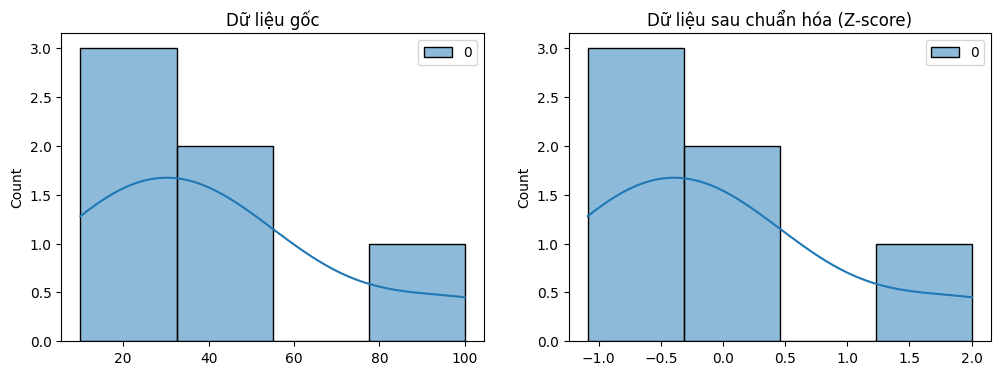

Giá trị lớn nhất sau chuẩn hóa: 2.0041


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Dữ liệu mẫu
data = np.array([10, 20, 30, 40, 50, 100]).reshape(-1, 1)

# Sử dụng Sklearn
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Trực quan hóa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data, kde=True, ax=ax1, color='blue').set_title("Dữ liệu gốc")
sns.histplot(data_scaled, kde=True, ax=ax2, color='green').set_title("Dữ liệu sau chuẩn hóa (Z-score)")
plt.show()

print(f"Giá trị lớn nhất sau chuẩn hóa: {data_scaled.max():.4f}")

## 2. Hồi quy Tuyến tính & Regularization

### 2.1 Lý thuyết
- **Mô hình:** $\hat{y} = wx + b$
- **Hàm mất mát (MSE):** $J = \frac{1}{n} \sum (y - \hat{y})^2$
- **Ridge (L2):** Phạt $w^2$ để giảm biên độ trọng số.
- **Lasso (L1):** Phạt $|w|$ để ép trọng số về 0 (chọn lọc đặc trưng).

### 2.2 Ví dụ tính tay (MSE)
- Dữ liệu thực tế: $(x=1, y=2), (x=2, y=4)$
- Dự đoán $\hat{y} = 1.5x + 0.8$
- Với $x=1, \hat{y}=2.3 \rightarrow$ Sai số $(2-2.3)^2 = 0.09$
- Với $x=2, \hat{y}=3.8 \rightarrow$ Sai số $(4-3.8)^2 = 0.04$
- $MSE = (0.09 + 0.04)/2 = 0.065$

### 2.3 Code minh họa & Trực quan hóa

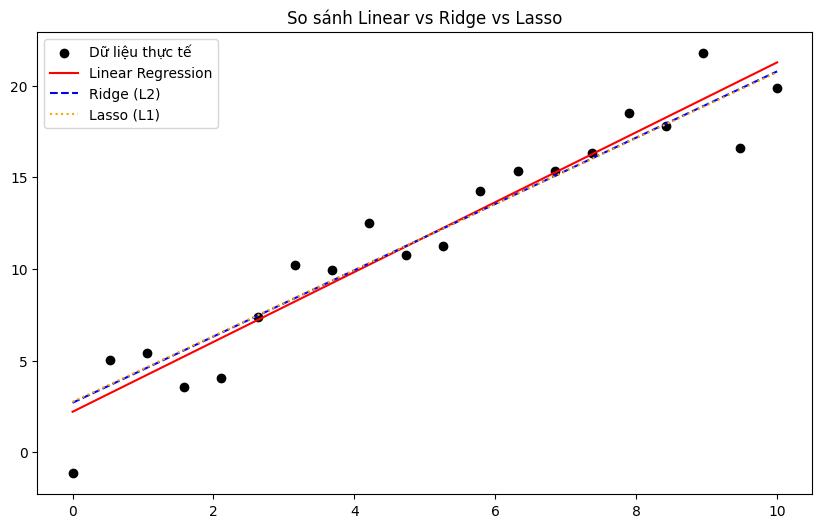

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Tạo dữ liệu có nhiễu
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 2, (20, 1))

# Huấn luyện các mô hình
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=10).fit(X, y)
lasso = Lasso(alpha=1).fit(X, y)

# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Dữ liệu thực tế')
plt.plot(X, lr.predict(X), label='Linear Regression', color='red')
plt.plot(X, ridge.predict(X), label='Ridge (L2)', linestyle='--', color='blue')
plt.plot(X, lasso.predict(X), label='Lasso (L1)', linestyle=':', color='orange')
plt.title("So sánh Linear vs Ridge vs Lasso")
plt.legend()
plt.show()

## 3. Logistic Regression (Phân lớp)

### 3.1 Lý thuyết
Sử dụng hàm **Sigmoid** để đưa giá trị về xác suất $[0, 1]$:
$$\large \sigma(z) = \frac{1}{1 + e^{-z}}$$

### 3.2 Ví dụ tính tay
- Tính giá trị dự báo $z = wx + b = 2.0$
- Xác suất lớp 1: $\sigma(2.0) = 1 / (1 + e^{-2.0}) \approx 1 / (1 + 0.135) \approx 0.88$
- Vì $0.88 > 0.5 \rightarrow$ Phân vào lớp 1.

### 3.3 Code minh họa & Trực quan hóa

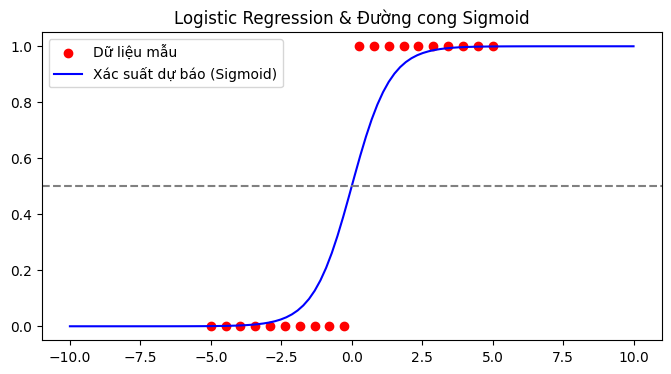

In [3]:
from sklearn.linear_model import LogisticRegression

# Tạo dữ liệu phân loại 1 chiều
X_log = np.linspace(-5, 5, 20).reshape(-1, 1)
y_log = (X_log > 0).astype(int).ravel()

model_log = LogisticRegression().fit(X_log, y_log)

# Trực quan hóa đường cong Sigmoid
X_test = np.linspace(-10, 10, 100).reshape(-1, 1)
probs = model_log.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 4))
plt.scatter(X_log, y_log, color='red', label='Dữ liệu mẫu')
plt.plot(X_test, probs, color='blue', label='Xác suất dự báo (Sigmoid)')
plt.axhline(0.5, color='gray', linestyle='--')
plt.title("Logistic Regression & Đường cong Sigmoid")
plt.legend()
plt.show()

## 4. KNN (K-Nearest Neighbors)

### 4.1 Lý thuyết
Khoảng cách Euclidean giữa 2 điểm $P(x_1, y_1)$ và $Q(x_2, y_2)$:
$$\large d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$$

### 4.2 Ví dụ tính tay
- Điểm A(1, 2) nhãn 0, Điểm B(4, 6) nhãn 1.
- Điểm cần dự báo X(2, 3). Với $K=1$.
- $d(X, A) = \sqrt{(2-1)^2 + (3-2)^2} = \sqrt{2} \approx 1.41$
- $d(X, B) = \sqrt{(4-2)^2 + (6-3)^2} = \sqrt{4+9} = \sqrt{13} \approx 3.6$
- Kết quả: X gần A hơn $\rightarrow$ Nhãn 0.

### 4.3 Code minh họa & Trực quan hóa

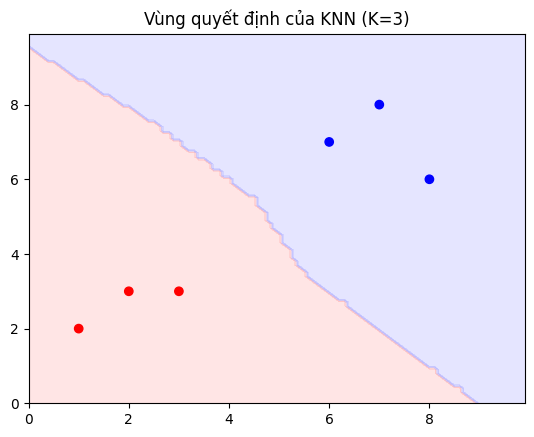

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Dữ liệu 2D mẫu
X_knn = np.array([[1, 2], [2, 3], [3, 3], [6, 7], [7, 8], [8, 6]])
y_knn = np.array([0, 0, 0, 1, 1, 1])

knn = KNeighborsClassifier(n_neighbors=3).fit(X_knn, y_knn)

# Trực quan hóa vùng quyết định (Decision Boundary)
x_min, x_max = 0, 10
y_min, y_max = 0, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_knn[:,0], X_knn[:,1], c=y_knn, cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title("Vùng quyết định của KNN (K=3)")
plt.show()

## 5. Decision Tree (Cây quyết định)

### 5.1 Lý thuyết
Chỉ số vẩn đục **Gini** (càng thấp càng tốt):
$$\large Gini = 1 - \sum p_i^2$$

### 5.2 Ví dụ tính tay
- Một nút có 10 mẫu: 7 mẫu Lớp A, 3 mẫu Lớp B.
- $p_A = 0.7, p_B = 0.3$
- $Gini = 1 - (0.7^2 + 0.3^2) = 1 - (0.49 + 0.09) = 0.42$

### 5.3 Code minh họa & Trực quan hóa

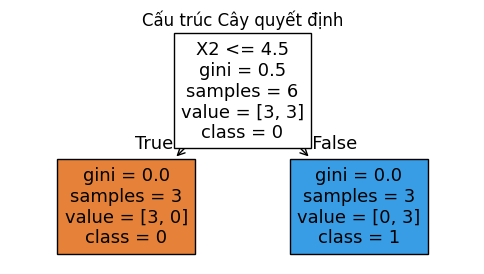

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=3).fit(X_knn, y_knn)

plt.figure(figsize=(6, 3))
plot_tree(dt, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'])
plt.title("Cấu trúc Cây quyết định")
plt.show()

## 6. K-Means (Phân cụm)

### 6.1 Lý thuyết
Mục tiêu là giảm **WCSS** (Within-Cluster Sum of Squares):
$$\large WCSS = \sum_{j=1}^{k} \sum_{x \in C_j} ||x - \mu_j||^2$$

### 6.2 Ví dụ tính tay (Gán cụm)
- Tâm cụm 1: (1,1). Tâm cụm 2: (5,5).
- Điểm dữ liệu P(2,2).
- Khoảng cách tới Tâm 1: $\sqrt{1^2+1^2} = \sqrt{2} \approx 1.41$
- Khoảng cách tới Tâm 2: $\sqrt{3^2+3^2} = \sqrt{18} \approx 4.24$
- Kết quả: P được gán vào Cụm 1.

### 6.3 Code minh họa & Trực quan hóa

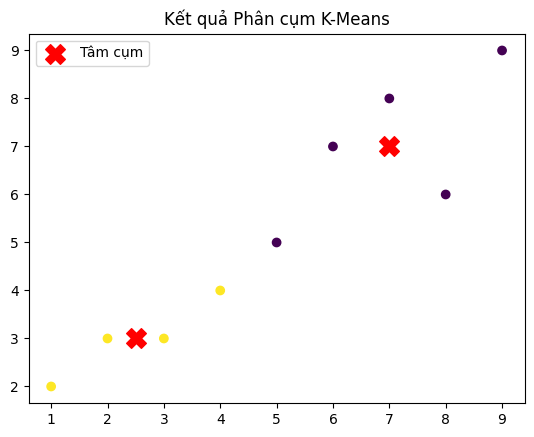

In [6]:
from sklearn.cluster import KMeans

# Dữ liệu không nhãn
X_cluster = np.vstack((X_knn, [[5,5], [4,4], [9,9]]))

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_cluster)

plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Tâm cụm')
plt.title("Kết quả Phân cụm K-Means")
plt.legend()
plt.show()